# **HackLive Stream 1**

## Panelists:

Nikhil Kumar Mishra
- Data Scientist at Analytics Vidhya
- Top 3 in 25+ Hackathons

Ankit Choudhary
- Sr Data Scientist at Analytics Vidhya
- Leading Hackathons Category at Analytics Vidhya

## Polls

## Google Colab: https://colab.research.google.com/

#**Initial Steps**

1. Go to Datahack website at
https://datahack.analyticsvidhya.com/contest/hacklive-guided-community-hackathon/#

2. Download the Dataset.

3. Upload the files as a zip in google colab

In [ ]:
from google.colab import files
files.upload()

!unzip -q hacklive_AV_Dataset.zip
!pip install --upgrade seaborn

Saving hacklive_AV_Dataset.zip to hacklive_AV_Dataset.zip
     |████████████████████████████████| 286kB 7.9MB/s 
  Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


# **Bank Marketing DataSet - Intelligent Targeting**

Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. Some important aspects of a marketing campaign are as follows: 

**Segment of the Population:** To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign. 

**Distribution channel to reach the customer's place:** Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.) 

**Promotional Strategy:** This is the way the strategy is going to be implemented and how are potential clients going to be address. This should be the last part of the marketing campaign analysis since there has to be an in-depth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

You are leading the marketing analytics team for a banking institution. There has been a revenue decline for the bank and they would like to know what actions to take. After investigation, it was found that the root cause is that their clients are not depositing as frequently as before. Term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can lend more and thus make more profits. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues.

You are provided a dataset containing details of marketing campaigns done via phone with various details for customers such as demographics, last campaign details etc. Can you help the bank to predict accurately whether the customer will subscribe to the focus product for the campaign - Term Deposit after the campaign?

## Data Description

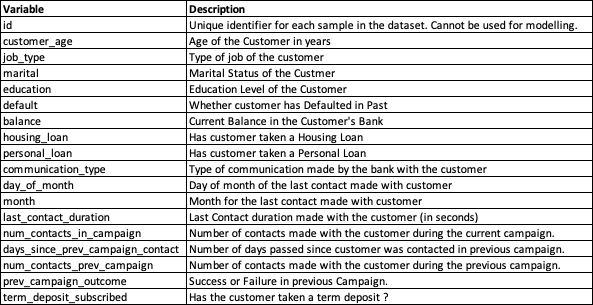

* We can see that variables 1 to 16 can be used for modelling. 
* Variable '**id**' is Identifier column. It has a unique value for every sample in the dataset and cannot be used for modelling.
* Variable '**term_deposit_subscribed**' is Target/y column. It has binary values and we need to learn to predict this variable given our above 16 variables as features.

#### **Hypothesis Generation**
Simply put, a hypothesis is a possible view or assertion of an analyst about the problem he or she is working upon. It may be true or may not be true.

* Are younger customers more likely to subscribe to a term deposit as compared to old customers ?

* Are people with a higher bank balance more likely subscribe to term deposit than people with low balance ?

* Does a married person have higher chances to subscribe to a term deposit compared to a single or divorced person ? 

* Does the length of the call made to the customers tell us anything about their chances of subscribing ?
(One may think that if the call length is longer, the customer executive has spent a longer time, discussing details with customer, hence the customer is more likely to subscribe).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')

# **EDA**

Before going to any kind of modelling, we will always want to have a look at the kind of data that we have.  

We have been provided three files. A description for what each of these files contain is given below:


1.     **SampleSubmission.csv**: This gives us a required format for submitting our solutions to the AV solution checker.
2.     **Train.csv**: We will use this file for training our model. It contains variables or features that we will input to our model, and the *target variable* that we want to predict.
3.     **Test.csv**: This will contain all variables in the training dataset except the *target variable*. We will use our trained model to predict the target for this dataset. 


Now lets go on to read and have a look at each of the files.

In [ ]:
ss = pd.read_csv('SampleSubmission_XkIpo3X.csv')
train = pd.read_csv('Train_eP48B9k.csv')
test = pd.read_csv('Test_jPKyvmK.csv')

In [ ]:
ss.head(20)

,id,term_deposit_subscribed
0,id_17231,0
1,id_34508,0
2,id_44504,0
3,id_174,0
4,id_2115,0
5,id_20153,0
6,id_20552,0
7,id_26080,0
8,id_45165,0
9,id_28373,0


Our sample submission file contains two columns: 'id' and 'term_deposit_subscribed'. We will use the same format to submit to AV. We don't need the ss for now, we will get back to it once we have completed our modelling and predicting phase.

Lets go and explore our training and test datasets. We will do the following steps:

1. Brief Look at the Dataset
2. See the dataset shape.
3. Target Distribution.
4. See the variables datatypes.
5. See the number of missing/null values.
6. See the number of unique values in each variable. 


#### **1. Brief look at the dataset**.

In [ ]:
train.head(3)
test.head(3)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0


,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown


In [ ]:
ID_COL, TARGET_COL = 'id', 'term_deposit_subscribed'

#### **2. Dataset Shape (Number of Samples and Variables in the dataset)**

In [ ]:
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest contains {test.shape[0]} samples and {test.shape[1]} variables')

features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
print(f'\nThe dataset contains {len(features)} features')


Train contains 31647 samples and 18 variables

Test contains 13564 samples and 17 variables

The dataset contains 16 features


#### 3. **Target Distribution**

This is a binary classification problem. Lets have a look at the number of positive and negative examples that we have, or in our problem statement terms: '*Number of People who did subscribe for a term deposit and the number of people who did not'*

In [ ]:
train[TARGET_COL].value_counts(normalize=True)

0    0.892754
1    0.107246
Name: term_deposit_subscribed, dtype: float64

Visually we are able to see communicate things more clearly and graphs help us do that. Lets visualize the same target distribution in a countplot.

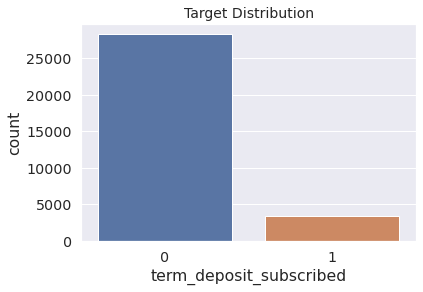

In [ ]:
_ = sns.countplot(train[TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

Quite obviously dataset is very imbalanced. Only about 10 % of the examples are positive.

####**4. Variable Datatypes**

Lets have a look at the kind of data types that is being used to store the variables in pandas.

pandas info() method on dataframe allows to do that. For each variable we can see the number of non-null values along with their datatypes.



In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

Looks like we have a mixture of datatypes, a lot of these variables are object datatypes. Object datatypes are used to store strings along with other non-numeric data. This is obvious since we encountered a lot of strings when we had a look at the dataset.

Machine Learning Models understand only numbers so we will have to later convert these strings to numbers

#### **5. Null Values**

Although the info() function did tell us about non-null values ideally we want to have a look at the percentage of null values in each variable.

In [ ]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

days_since_prev_campaign_contact    81.6
customer_age                        2.0 
balance                             1.3 
last_contact_duration               1.0 
personal_loan                       0.5 
marital                             0.5 
num_contacts_in_campaign            0.4 
job_type                            0.0 
education                           0.0 
default                             0.0 
term_deposit_subscribed             0.0 
housing_loan                        0.0 
prev_campaign_outcome               0.0 
communication_type                  0.0 
day_of_month                        0.0 
month                               0.0 
num_contacts_prev_campaign          0.0 
id                                  0.0 
dtype: float64

One feature 'days_since_prev_campaign_contact' has a lot of null values around 81.6 %, which might mean that these customers were never reached out in the previous campaign, there are few missing values in customer age, balance, last contact duration, personal loan, marital status & number of contacts in campaign

#### **6. Unique values in each variable**

In [ ]:
train.nunique()

id                                  31647
customer_age                        77   
job_type                            12   
marital                             3    
education                           4    
default                             2    
balance                             6563 
housing_loan                        2    
personal_loan                       2    
communication_type                  3    
day_of_month                        31   
month                               12   
last_contact_duration               1447 
num_contacts_in_campaign            46   
days_since_prev_campaign_contact    511  
num_contacts_prev_campaign          41   
prev_campaign_outcome               4    
term_deposit_subscribed             2    
dtype: int64

The numerical features 'balance', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact', 'num_contacts_prev_campaign' contain a lot of unique values which is quite obvious.

Similarly 'day_of_month' contains 31 unique values for each of 31 possible days in a month. Month from January to December contains '12' unique values.

### **Analyzing Each Variable & their relationships**

There are two types of features that we have:

1. Categorical
2. Numerical

Also our target is Binary

For each feature type we will be perform two types of analysis:

1. Univariate: Analyze 1 feature at a time

2. Bivariate: Analyze the relationship of that feature with target variable, i.e. 'term_deposit_subscribed'


But before jumping straight into analysis, lets have a look at the variables we had and try to ask some questions ourselves



In [ ]:
train.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

### Segregating Categorical & Numerical Variables

In [ ]:
cat_cols = ['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

In [ ]:
num_cols = [c for c in features if c not in cat_cols]
num_cols

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign']

#### **Categorical Features**

#### **Univariate Analysis - Pie Charts.**

Pie Charts can be useful in seeing the proportion of samples, that fall into each category of a categorical variable. For each of the categorical variables we will make a pie chart.

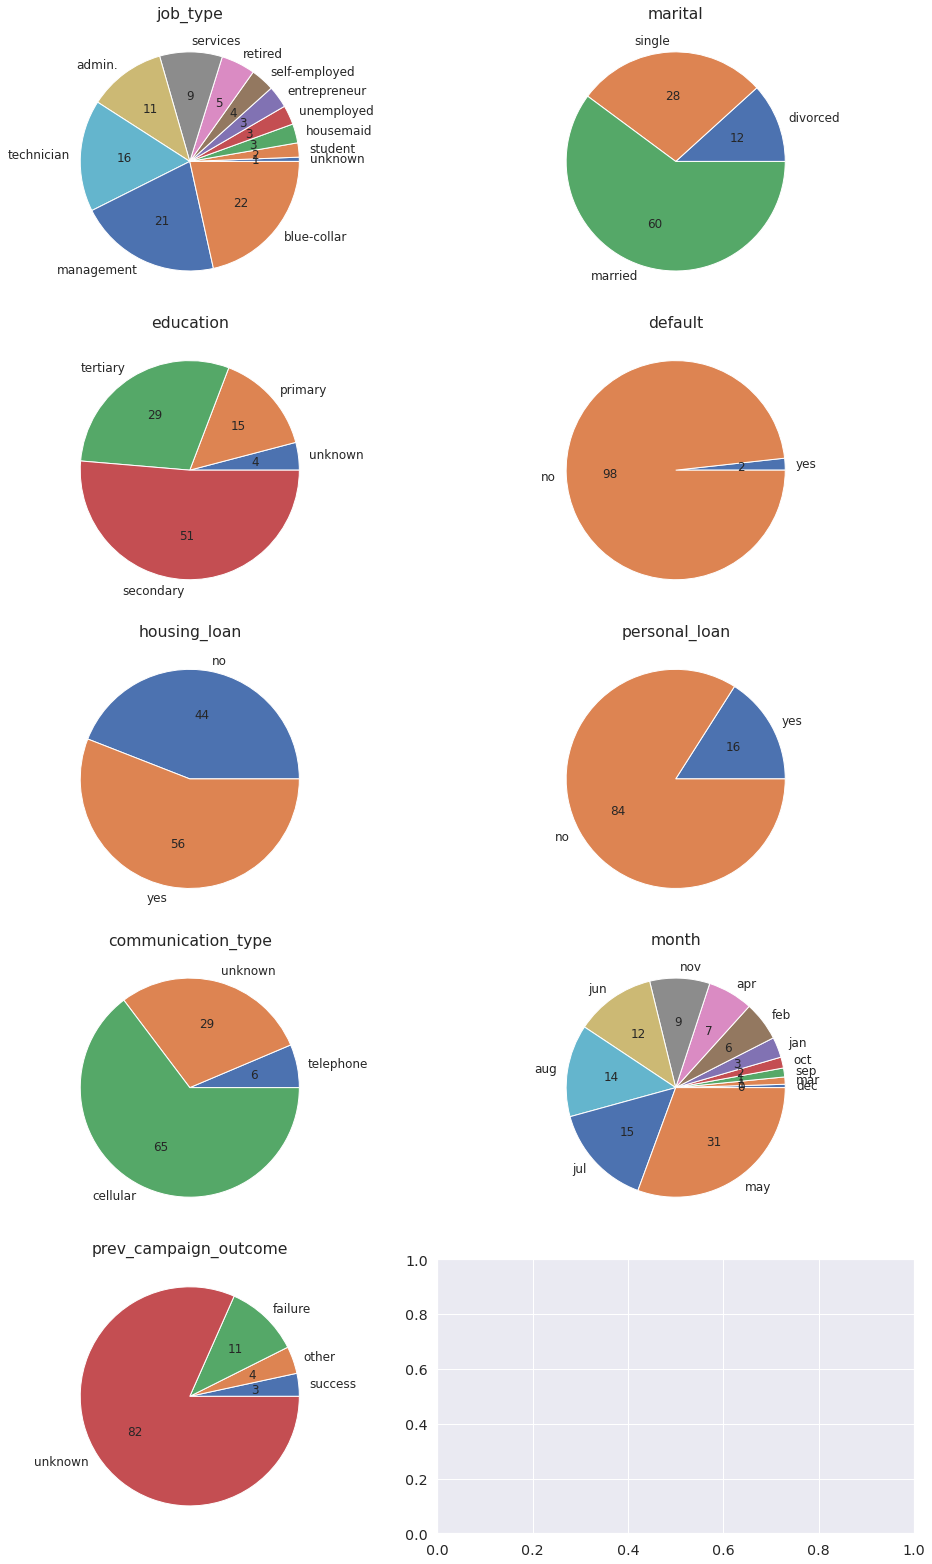

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

#### **Univariate Analysis - CountPlots**

Another way of looking at the counts of each of the categories is countplots. These are similar to barplots with the width of the bars representing the count of the category in the variable

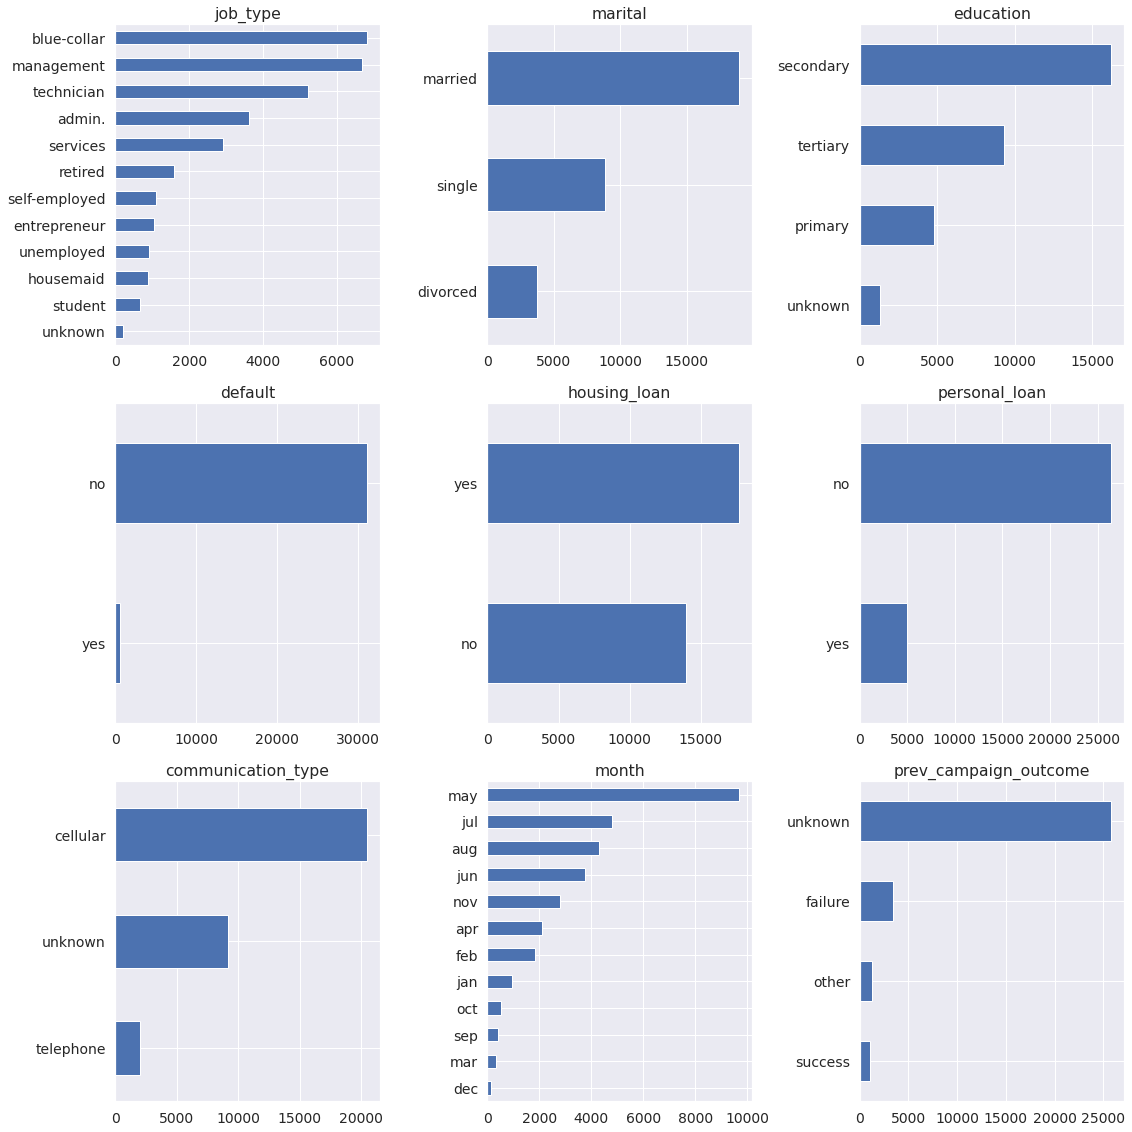

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

##### **Bivariate Analysis Relationships with Target**

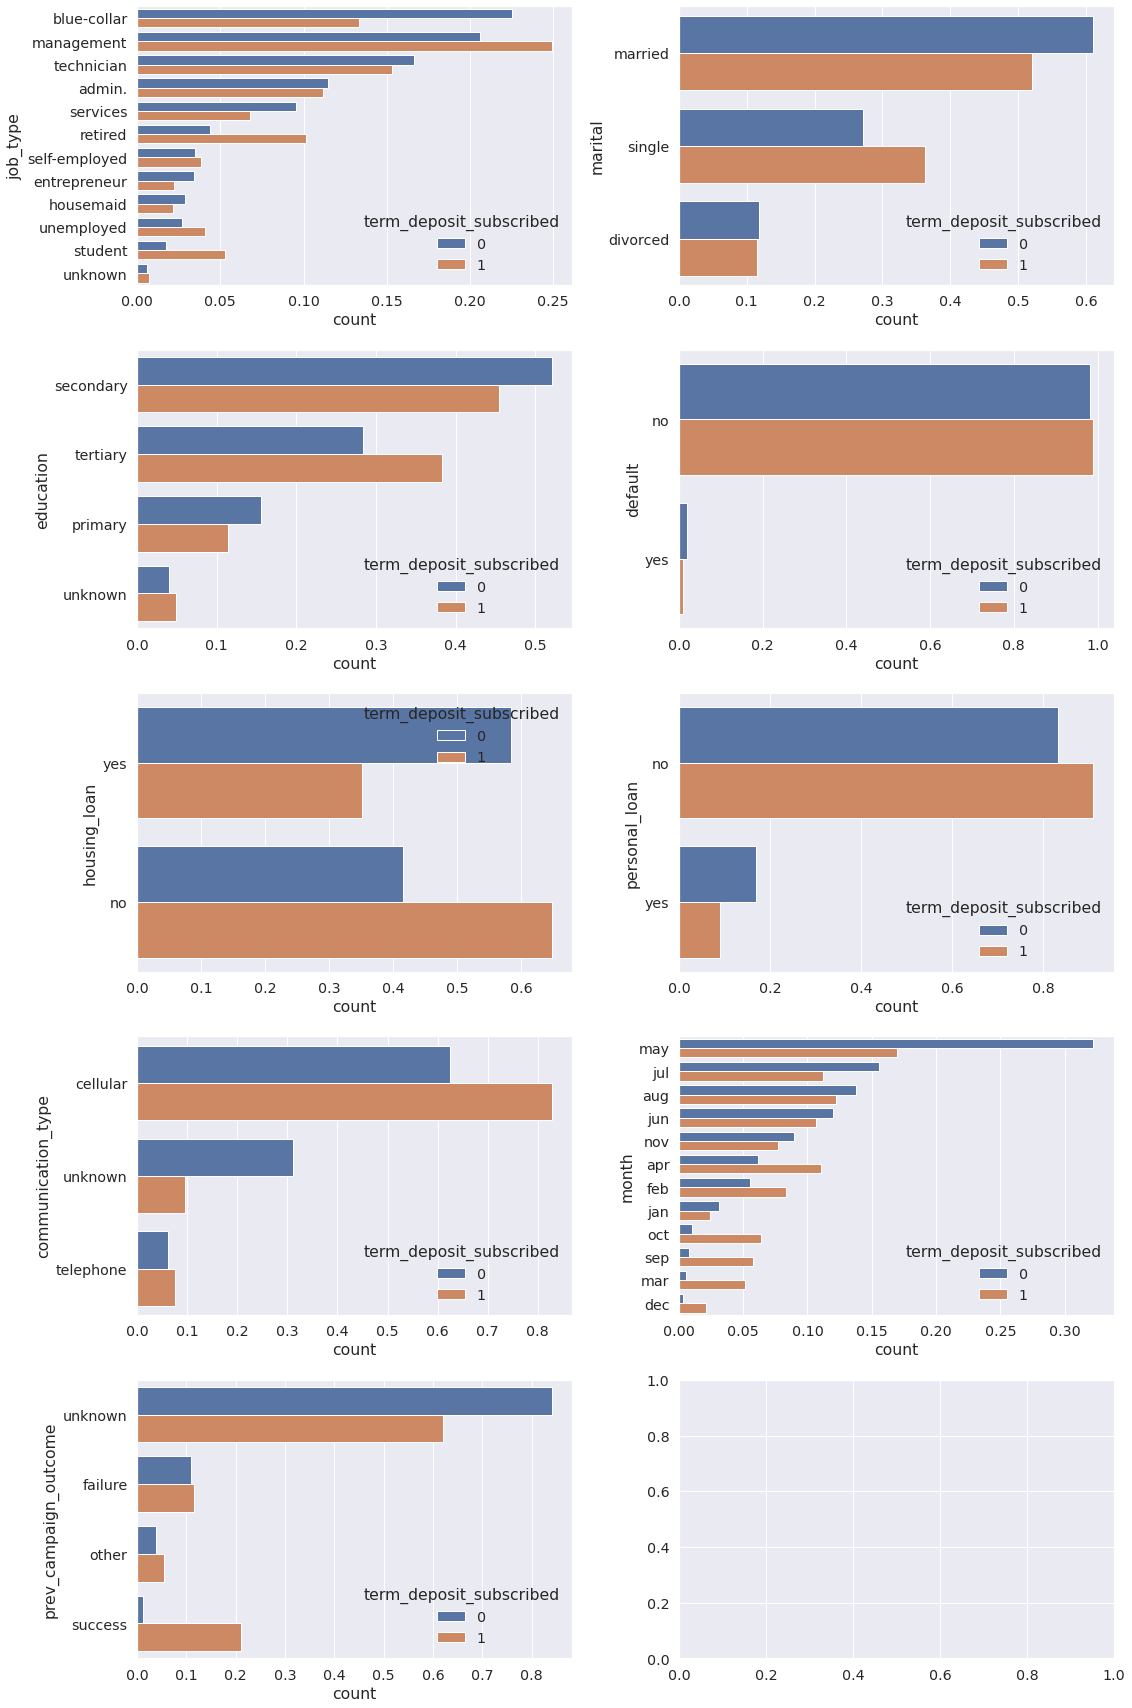

In [ ]:

fig, axes = plt.subplots(5, 2, figsize=(16, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    fltr = train[TARGET_COL] == 0
    vc_a = train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a[TARGET_COL] = 0
    vc_b[TARGET_COL] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue=TARGET_COL, ax=axes[i])
    
_ = plt.tight_layout()

**Q. Do married people have more chances of subscribing to a term deposit ?**


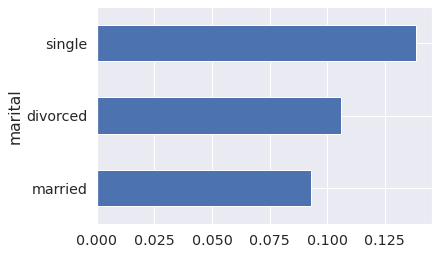

In [ ]:
_ = train.groupby('marital')[TARGET_COL].mean().sort_values().plot(kind = 'barh')

The data tells us quite a different story than our initial thought process, single people are the more likely to subscribe to a term deposit. 

#### **Numerical Features**

##### 1. **Univariate Analysis - Boxplots**

Boxplot can be used to see the spread of the numerical variables, and identify outliers

https://en.wikipedia.org/wiki/Box_plot


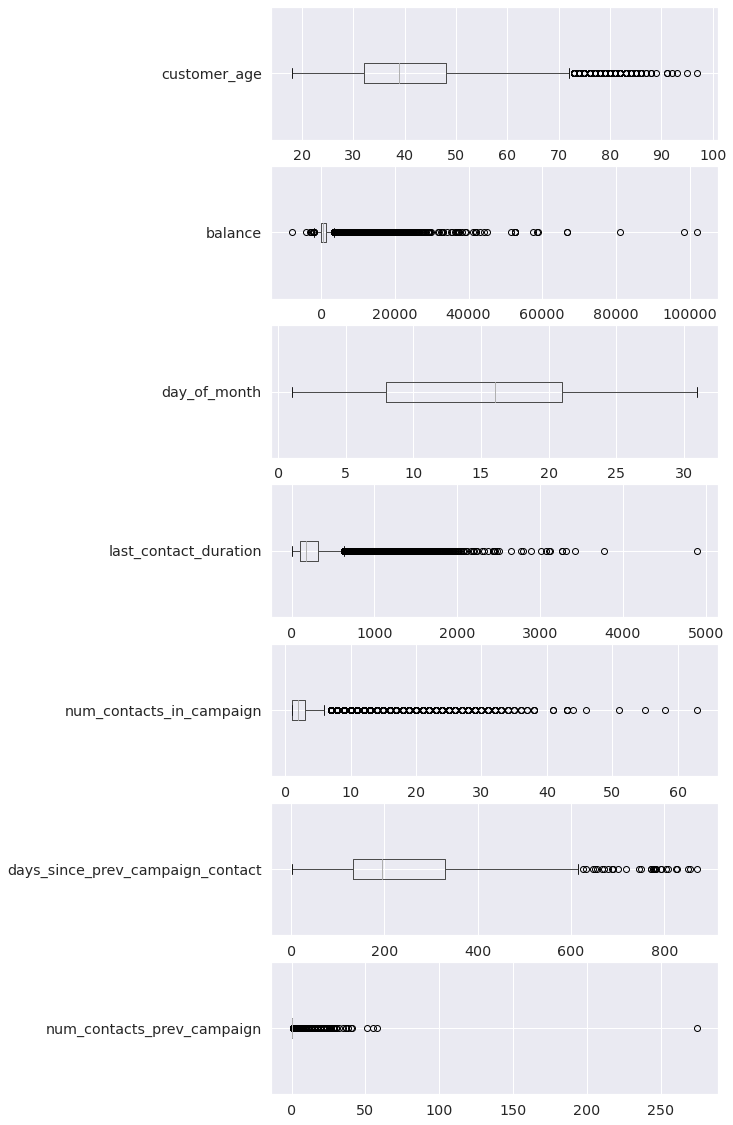

In [ ]:
fig, axes = plt.subplots(7, 1, figsize=(8, 20))
for i, c in enumerate(num_cols):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

##### **2. Univariate Analysis - Density Plots**

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

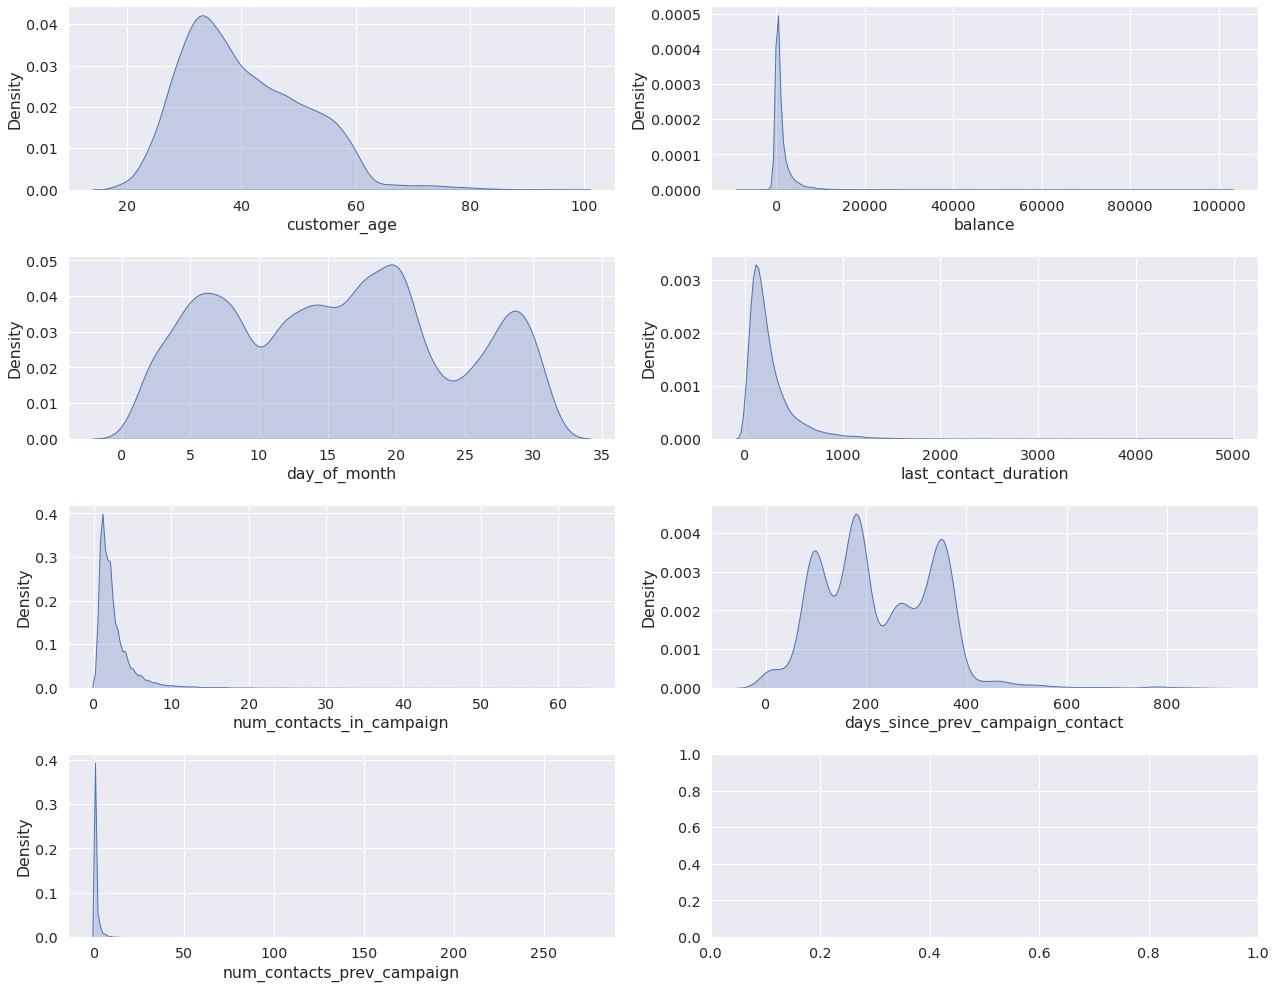

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=train, x=c, ax=axes[i], fill=True)
plt.tight_layout()

##### **3. Bivariate Analysis KDE plots - Relationships with Target Variable**.

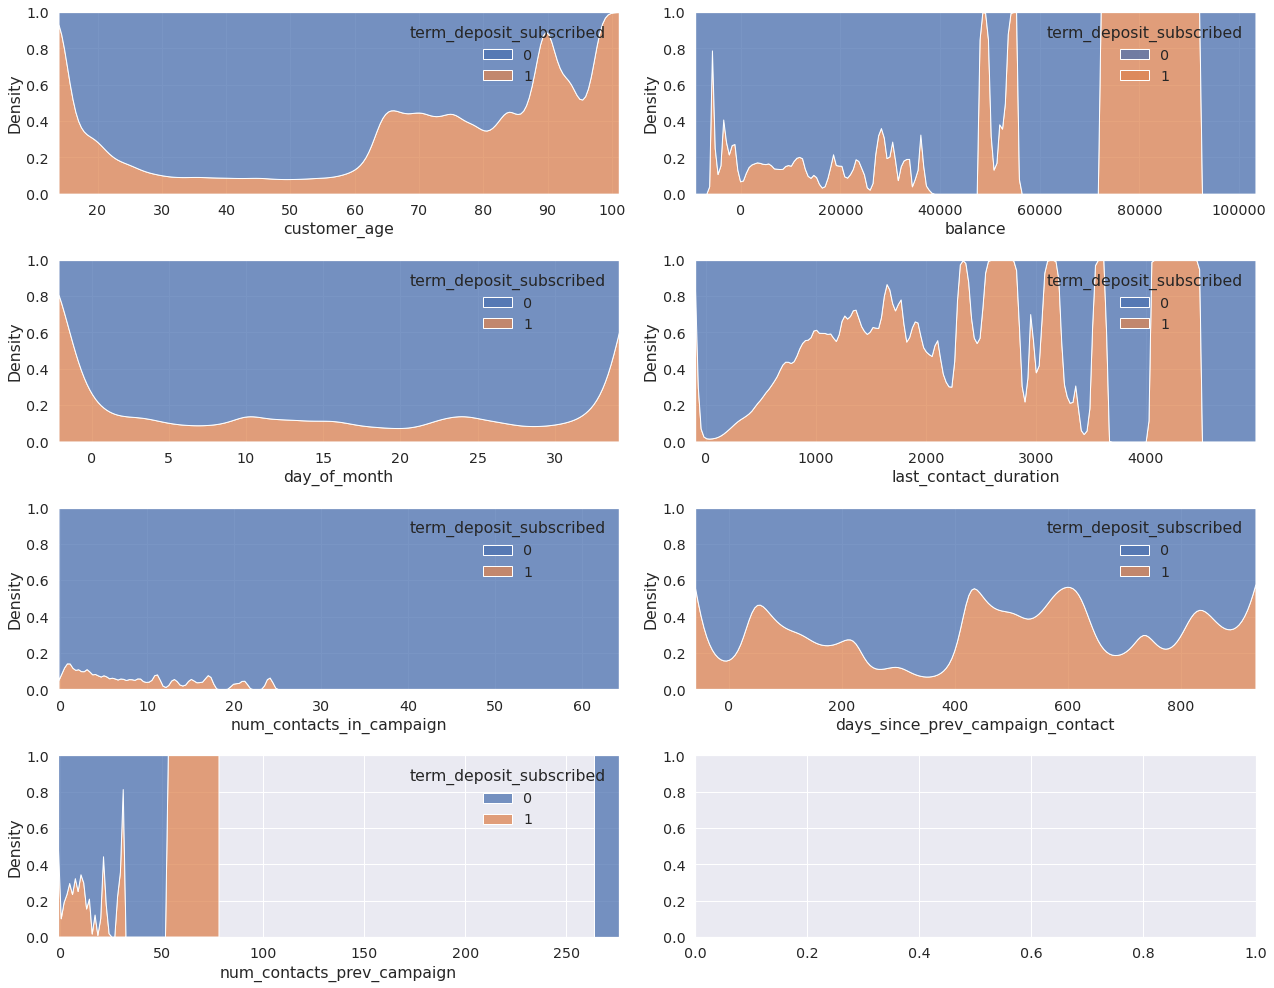

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=train, x=c, hue=TARGET_COL, multiple='fill', ax=axes[i])
plt.tight_layout()

##### **4. Bivariate Analysis - Horizontal BarPlots**

For each numerical Variable. We will plot the median of the numerical variable for:


1. When term_deposit_subscribed == 0
2. when term_deposit_subscribed == 1

**We are choosing median since median is not affected by outliers**, and our data has a lot of outlers

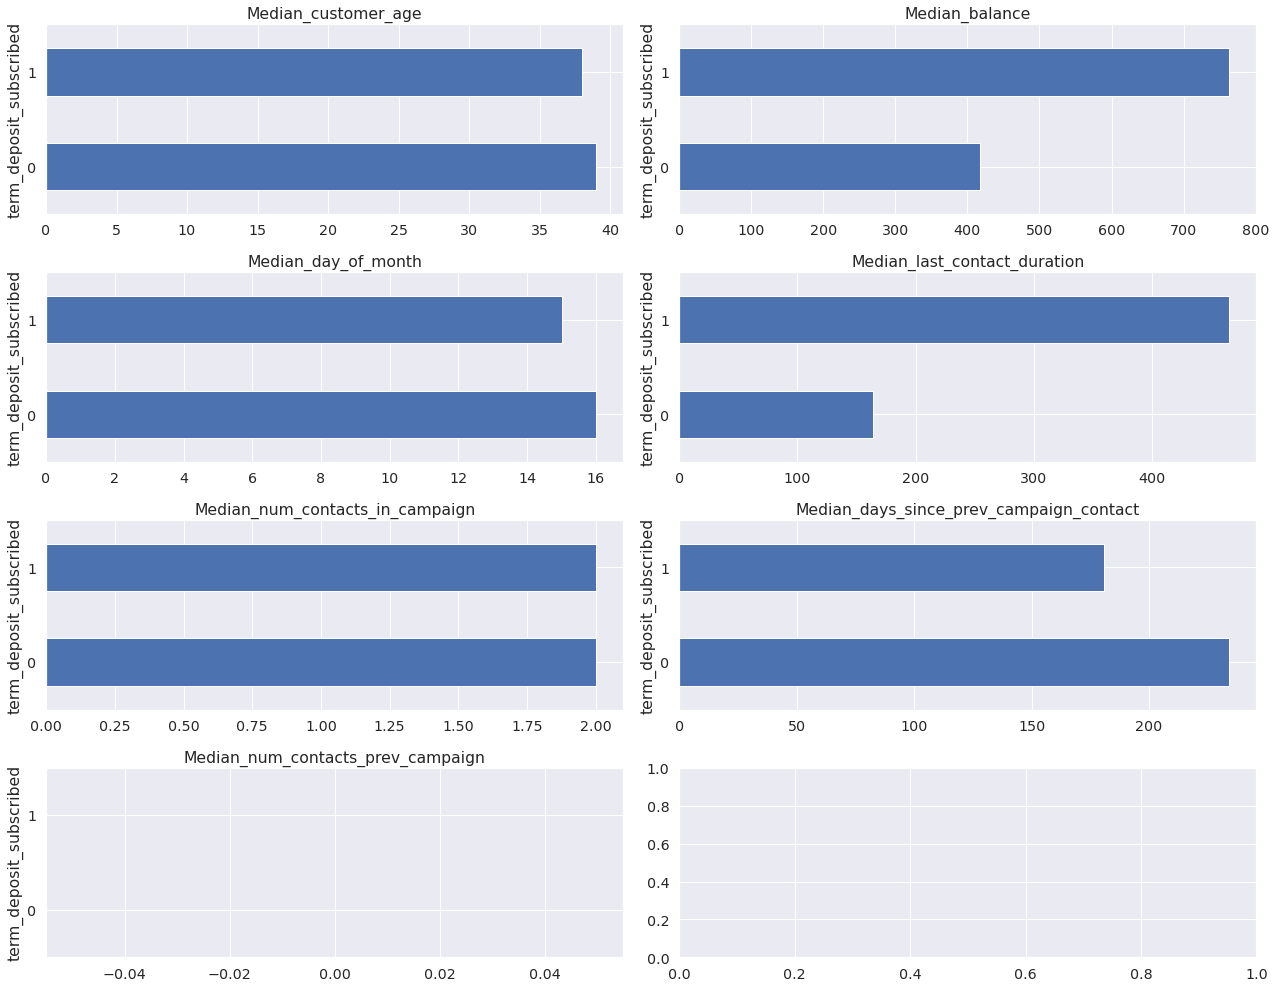

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = train.groupby(TARGET_COL)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])
plt.tight_layout()

**Q. Do people with a higher bank balance more likely subscribe to term deposit than people with low balance ?**

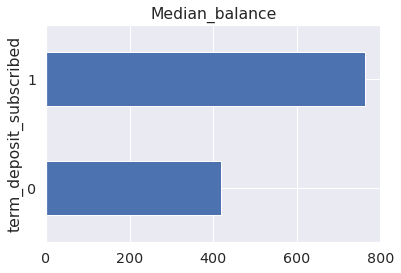

In [ ]:
_ = train.groupby(TARGET_COL)['balance'].median().plot(kind = 'barh', title=f'Median_balance')

If you see the plot above median balance of customers not subscribing to a term deposit is around 400 whereas median balance of customers subscribing to a term deposit is 800. This definitely supports our initial hypothesis.

**Q. Does the length of the call made to the customers tell us anything about their chances of subscribing ?**

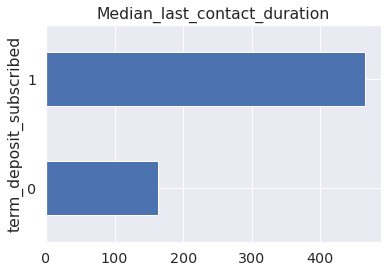

In [ ]:
_ = train.groupby(TARGET_COL)['last_contact_duration'].median().plot(kind = 'barh', title=f'Median_last_contact_duration')

From the plot above median last_call_duration made to the customers not subscribing to a term deposit is around 150 seconds. Median last_call_duration made to the customers subscribing to a term deposit is around 450 seconds. So yes our hypothesis seems true.

**Q. Are younger customers more likely to subscribe to a term deposit compared to old customers ?**

It's not very clear from our above plot since we have median age of around 40 for both cases

Lets dig deeper.

We will define:
 old as Age > 60
 Not Old as Age <= 60

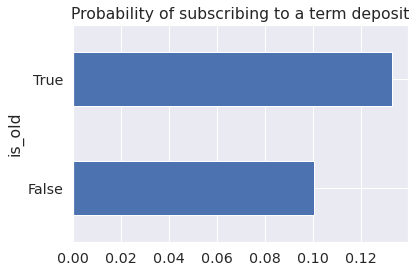

In [ ]:
train['is_old'] = True
train.loc[train['customer_age'] <= 50, 'is_old'] = False

_ = train.groupby('is_old')[TARGET_COL].mean().sort_values().plot(kind = 'barh', title='Probability of subscribing to a term deposit')

Looks like old age customers are definitely more likely to subscribe to a term deposit compared to younger age customers

##### **5. Bivariate Analysis - Correlation Heatmaps**

<Figure size 1008x576 with 0 Axes>

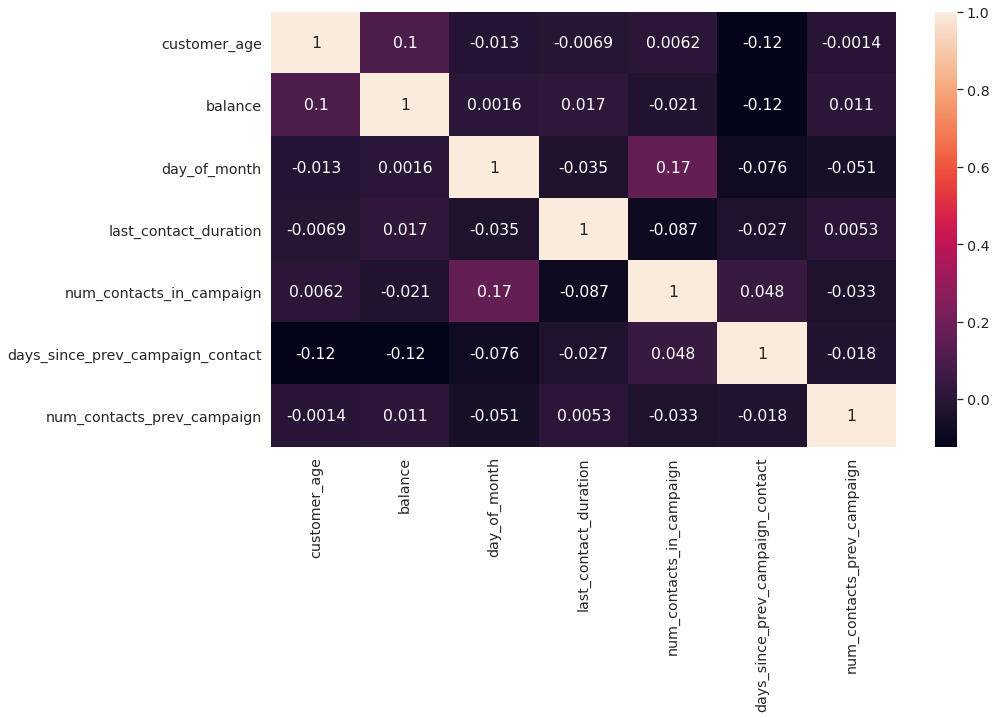

In [ ]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols].corr(), annot=True)

**Exercise**

What are the more interesting things you can find from this correlation plot ? 

1. EDA has a structure but it is also an art
2. Its not about how beautiful the plots are
3. EDA is the backbone of any ML project for structured data

**Next steps for EDA: Ideas and Suggestions.**

This was a basic EDA, to demonstrate its purpose. However the data contains a lot more hidden information. EDA has no end, and as we dig deeper into the data, we are sure to find more meaningful and interesting insights.

1. **Do a multivariate Feature Analysis**. Here we only have taken a look at each of the features and its relationship with the target variable, or relationship betwen two features. But can two or more features together influence the target more ?

2. **Dig deeper into more important features**. This can be done with the help of Feature Importance Scores. In the next section we will see how to create a baseline model and get feature importances.

# Metric and Baseline Model

**F1 Score**


In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive.

The F1 score is the harmonic mean of the precision and recall. The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero. 

https://en.wikipedia.org/wiki/F1_score



## **Baseline Models**

**Helper Function to Download Test Predictions as CSV**

In [ ]:
ss.head()

,id,term_deposit_subscribed
0,id_17231,0
1,id_34508,0
2,id_44504,0
3,id_174,0
4,id_2115,0


In [ ]:
def download_preds(preds_test, file_name = 'hacklive_sub.csv'):

  ## 1. Setting the target column with our obtained predictions
  ss[TARGET_COL] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

  ## 3. Downloading and submitting the csv file
  from google.colab import files
  files.download(file_name)

### **Model A. (Predicting all instances as majority)**

In [ ]:
target = train[TARGET_COL]
target.value_counts()

0    28253
1    3394 
Name: term_deposit_subscribed, dtype: int64

As we saw before too, 0 is the majority class. Lets begin by predicting everything as 0.

In [ ]:
preds_target = np.zeros(len(train))

accuracy = accuracy_score(target, preds_target)
f1 = f1_score(target, preds_target)

print(f'Accuracy score is: {accuracy}')
print(f'F1 score is: {f1}')

Accuracy score is: 0.892754447498973
F1 score is: 0.0


In [ ]:
preds_test = np.zeros(len(test))

In [ ]:
download_preds(preds_test, file_name = 'haklive_zero_sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Had the metric been accuracy, we would have got an accuracy of almost 90 %, but F1-score is forcing us to create a better model.
There's no point submitting a model with train score of 0 to the leaderboard, but you are welcome to try

### **Model B. (Random Predictions with equal probability)**

In [ ]:
#### Since we are dealing with randomness, its important to set a seed, so we get same randomness everytime.
np.random.seed(2)

preds_target = np.random.choice([0, 1], size=len(train))


f1_score(target, preds_target)

0.1767384105960265

Not an excellent score. Nevertheless it is much better than getting 0. Lets submit this on the leaderboard.

In [ ]:
np.random.seed(2)
preds_test = np.random.choice([0, 1], size=len(test))
download_preds(preds_test, file_name = 'haklive_random_sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This scores 0.1897 on the leaderboard, quite similar to our train score.

###  **Rule Based: Classifying using Most Important Feature(s)**

We saw that balance and last_contact_duration could tell us a lot about the target.

Just to recap here were the plots that we got.

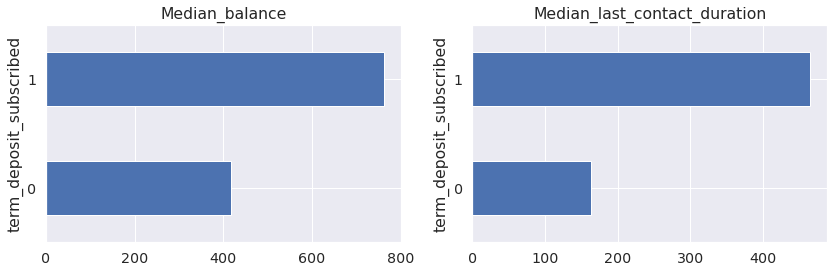

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
for i, c in enumerate(['balance', 'last_contact_duration']):
  plot = train.groupby(TARGET_COL)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])

We had observe that customers subscribing a not subscribing a term deposit have a median account balance of approx 400 and median_last_contact_duration of around 150.

So initially we can classify all samples with balance < 400, and median_last_contact_duraiton < 150 as 0 or 'term_deposit_not_subscribed'



In [ ]:
def rule_based_clf(df):
  preds = np.ones(len(df))
  rule = (df['last_contact_duration'] < 200) | (df['balance'] < 400)
  preds[rule] = 0
  return preds

In [ ]:
preds_train = rule_based_clf(train)
f1_score(target, preds_train)

0.33115506888025437

In [ ]:
preds_test = rule_based_clf(test)
download_preds(preds_test, file_name='hacklive_rule_based_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This scores **0.30364** on the leaderboard. Again very close to our train score.

**Exercise**

* Try changing the thresholds from 150 and 400 to something else, how does the training score vary ? How does the test score vary ?
* Try analyzing the data to create more such rules to classify the examples.

# **Q/A Time**